In [1]:
from pygalfitm.VOs import splus

from pygalfitm.read import read_output_to_class

import pandas as pd
import splusdata
import os

conn = splusdata.connect()
df = pd.read_csv("blueE_test_galfitm.csv")

bands = ["z", "i", "r", "g", "u"]

DATA_FOLDER = "../data/"
OUTPUT_FOLDER = "../outputs/"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

for key, value in df.iterrows():
    name = value["ID"]

    ra = value["RA"]
    dec = value["DEC"]

    cut_size = 200

    outfolder = os.path.join(OUTPUT_FOLDER, name)
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    
    try: 
        pygal_obj = splus.get_splus_class(
            name, ra, dec, cut_size, 
            data_folder=DATA_FOLDER,
            output_folder=outfolder,
            conn=conn,
            remove_negatives=True, 
            bands = bands
        )
    except:
        continue

    pygal_obj.write_feedme()
    _ = pygal_obj.run()

    os.path.join(outfolder, f"{name}ss.galfit.01.band")
    result_obj = read_output_to_class(os.path.join(outfolder, f"{name}ss.galfit.01.band"))
    
    res_df = result_obj.create_result_table()
    if not os.path.exists(os.path.join(OUTPUT_FOLDER, f"all_results.csv")):
        res_df.to_csv(os.path.join(OUTPUT_FOLDER, f"all_results.csv"))
    else:
        df = pd.read_csv(os.path.join(OUTPUT_FOLDER, f"all_results.csv"), index_col=0)
        df = pd.concat([df, res_df], axis=1)
        df.to_csv(os.path.join(OUTPUT_FOLDER, f"all_results.csv"))

You have access to internal data
finished
finished
finished
finished
finished
sersic
finished
finished
finished
finished
finished
sersic
finished
finished
finished
finished
finished
sersic
finished
finished
finished
finished
finished
sersic
finished
finished
finished
finished
finished


UnitTypeError: Longitude instances require units equivalent to 'rad', but no unit was given.

In [33]:
import pygalfitm
import pandas as pd
import os
import splusdata

import matplotlib
matplotlib.use('Agg')


In [34]:
from pygalfitm.read import read_output_to_class

In [18]:
conn = splusdata.connect()

splus.cloud username: gustavo
splus.cloud password: ········
You have access to internal data


In [19]:
CUT_SIZE = 200

In [2]:
df = pd.read_csv('/Users/gustavo/Downloads/Fornax galaxies comparison - Página1.csv')

In [12]:
def get_column_labels(columns):
    dec_col = ''
    ra_col = ''
    ID_col = ''
    for cols in df.columns:
        if 'dec' in cols.lower():
            dec_col = cols
        if 'ra' in cols.lower():
            ra_col = cols
        if 'id' in cols.lower():
            ID_col = cols
    
    return ra_col, dec_col, ID_col

In [21]:
SPLUS_WAVELENGHTS = {
            "i": 7670.59, 
            "r": 6251.83, 
            "g": 4758.49, 
            "z": 8936.64,
            "u": 3533.29, 
            "J0378": 3773.13, 
            "J0395": 3940.70, 
            "J0410": 4095.27, 
            "J0430": 4292.39,
            "J0515": 5133.15,
            "J0660": 6613.88,
            "J0861": 8607.59
},

In [22]:
SPLUS_WAVELENGHTS = {
    "i": 7670.59,
    "r": 6251.83,
    "g": 4758.49,
    "z": 8936.64,
    "u": 3533.29,
    "J0378": 3773.13,
    "J0395": 3940.70,
    "J0410": 4095.27,
    "J0430": 4292.39,
    "J0515": 5133.15,
    "J0660": 6613.88,
    "J0861": 8607.59
}

sorted_wavelengths = sorted(SPLUS_WAVELENGHTS, key=SPLUS_WAVELENGHTS.get)
bands = sorted_wavelengths

['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']


In [23]:
bands = ['u', 'J0378', 'J0395', 'J0410', 'J0430', 'g', 'J0515', 'r', 'J0660', 'i', 'J0861', 'z']

In [11]:
DATA_FOLDER = "../data/"
OUTPUT_FOLDER = "../outputs/"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


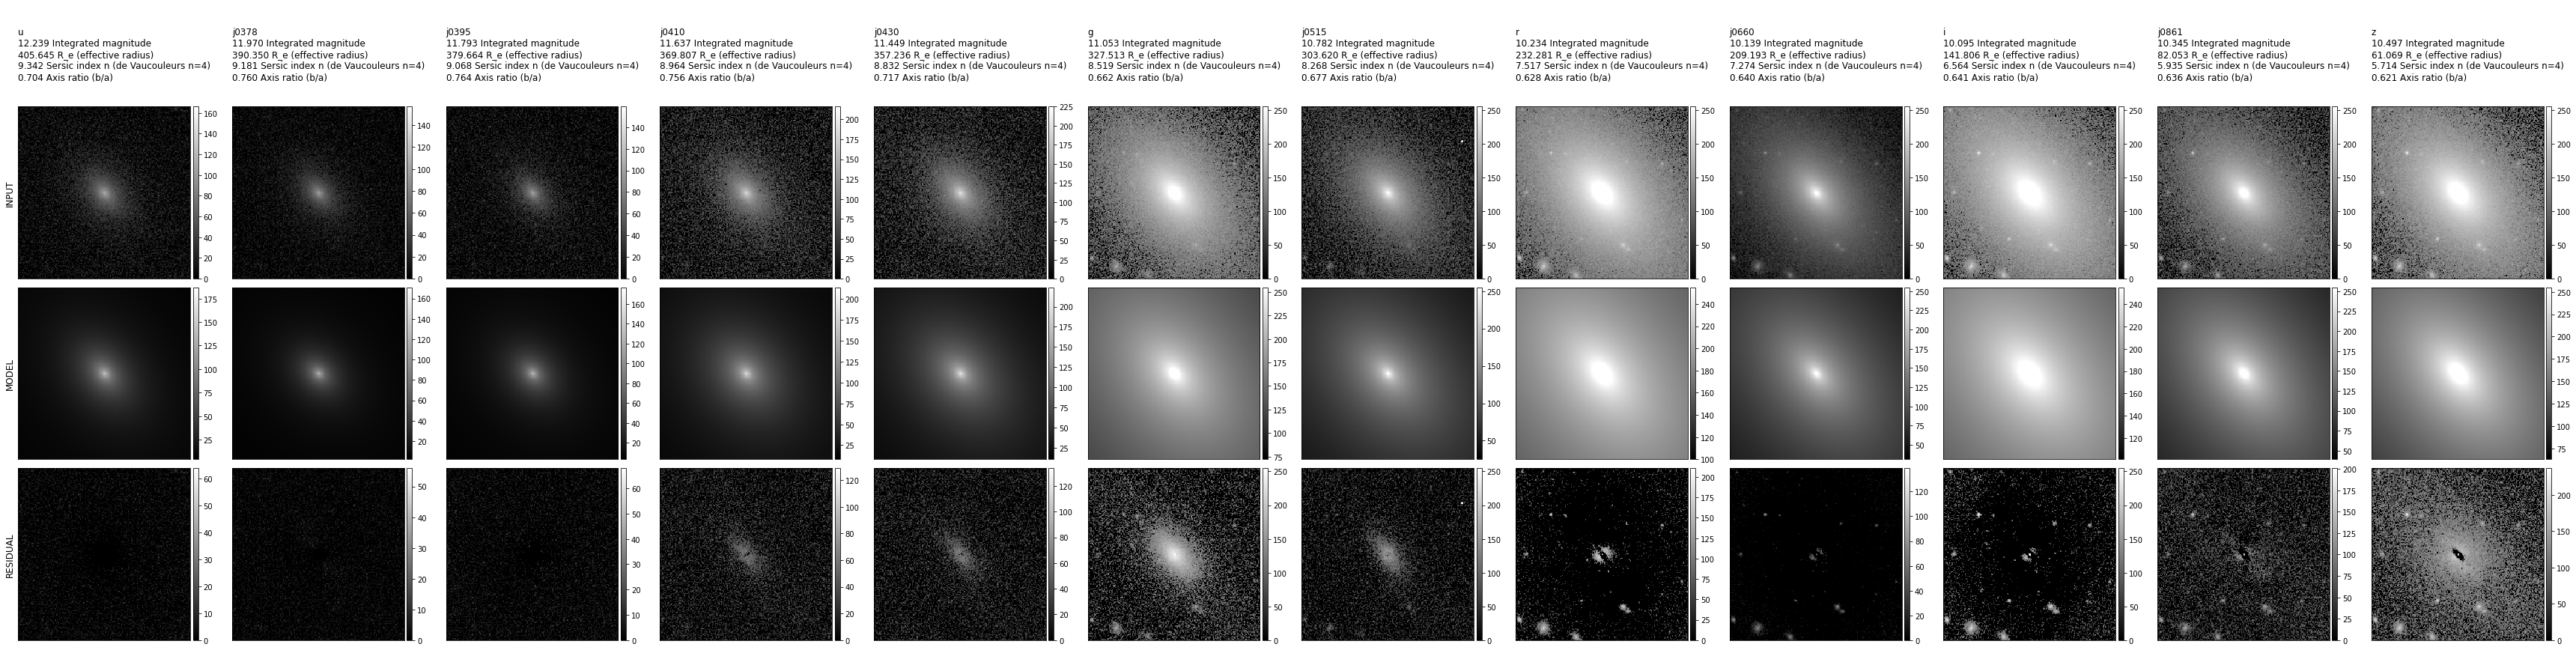

In [49]:
ra_col, dec_col, ID_col = get_column_labels(df.columns)

for key, value in df.iterrows():
    name = value[ID_col]
    ra = value[ra_col]
    dec = value[dec_col]
    
    cut_size = CUT_SIZE

    outfolder = os.path.join(OUTPUT_FOLDER, name)
    datafolder = os.path.join(DATA_FOLDER, name)
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    
    try: 
        pygal_obj = pygalfitm.splus.get_splus_class(
            name, ra, dec, cut_size, 
            data_folder=datafolder,
            output_folder=outfolder,
            conn=conn,
            remove_negatives=True, 
            bands = bands
        )
        
    except Exception as e:
        print(e)
        print(f"Skipping {name}")
        continue
    
    pygal_obj.write_feedme()
    pygal_obj.create_fits_table(os.path.join(OUTPUT_FOLDER, "before_fit.fits"))
    
    _ = pygal_obj.run()

    os.path.join(outfolder, f"{name}ss.galfit.01.band")
    result_obj = read_output_to_class(os.path.join(outfolder, f"{name}ss.galfit.01.band"))
    
    plot = result_obj.gen_plot(
        "sersic", 
        return_plot = True, 
        plot_parameters=[3, 4, 5, 9], 
        colorbar=True
    )
    plot.savefig(os.path.join(outfolder, f"{name}_plot.pdf"))
    
    result_obj.create_fits_table(os.path.join(OUTPUT_FOLDER, "after_fit.fits"))

In [29]:
name = df["ID"][0]

ra = df["RA"][0]
dec = df["DEC"][0]

cut_size = 200

KeyError: 'DEC'

In [6]:
outfolder = os.path.join(OUTPUT_FOLDER, name)
if not os.path.exists(outfolder):
    os.makedirs(outfolder)
    
pygal_obj = splus.get_splus_class(
    name, ra, dec, cut_size, 
    data_folder=DATA_FOLDER,
    output_folder=outfolder,
    conn=conn,
    remove_negatives=True, 
    bands = bands
)

Writing /Users/gustavo/miniconda3/lib/python3.9/site-packages/pygalfitm-0.1-py3.9.egg/pygalfitm/VOs/splusZPs.csv
Done!
finished
finished
finished
finished
finished


In [8]:
pygal_obj.write_feedme()
_ = pygal_obj.run()

In [9]:
from pygalfitm.read import read_output_to_class

In [10]:
os.path.join(outfolder, f"{name}ss.galfit.04.band")

'../outputs/Fornax.SPLUS-s25s33.001160/Fornax.SPLUS-s25s33.001160ss.galfit.04.band'

In [11]:
result_obj = read_output_to_class(os.path.join(outfolder, f"{name}ss.galfit.01.band"))

1) 102.498,102.498,102.498,102.498,102.498 1,0,0,0,0 band       #      Position x
2) 99.749,99.749,99.749,99.749,99.749  1,0,0,0,0 band       #      Position y
3) 12.772,12.854,13.102,13.541,14.038  1,1,1,0,0 band       #  Integrated magnitude
4) 259.935,274.586,291.004,308.286,322.464 1,1,0,0,0 band       #  R_e (effective radius)   [pix]
5) 5.069,4.988,4.897,4.801,4.722       1,1,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0                           0,0,0,0,0 band       #     -----
7) 0,0,0,0,0                           0,0,0,0,0 band       #     -----
8) 0,0,0,0,0                           0,0,0,0,0 band       #     -----
9) 0.914,0.861,0.861,0.942,0.658       1,0,0,0,0 band       #  Axis ratio (b/a)
10) 16.951,17.433,17.236,12.514,19.637  1,0,0,0,0 band       #  Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                   #     Skip       # his model in output image?  (yes=1, no=0)


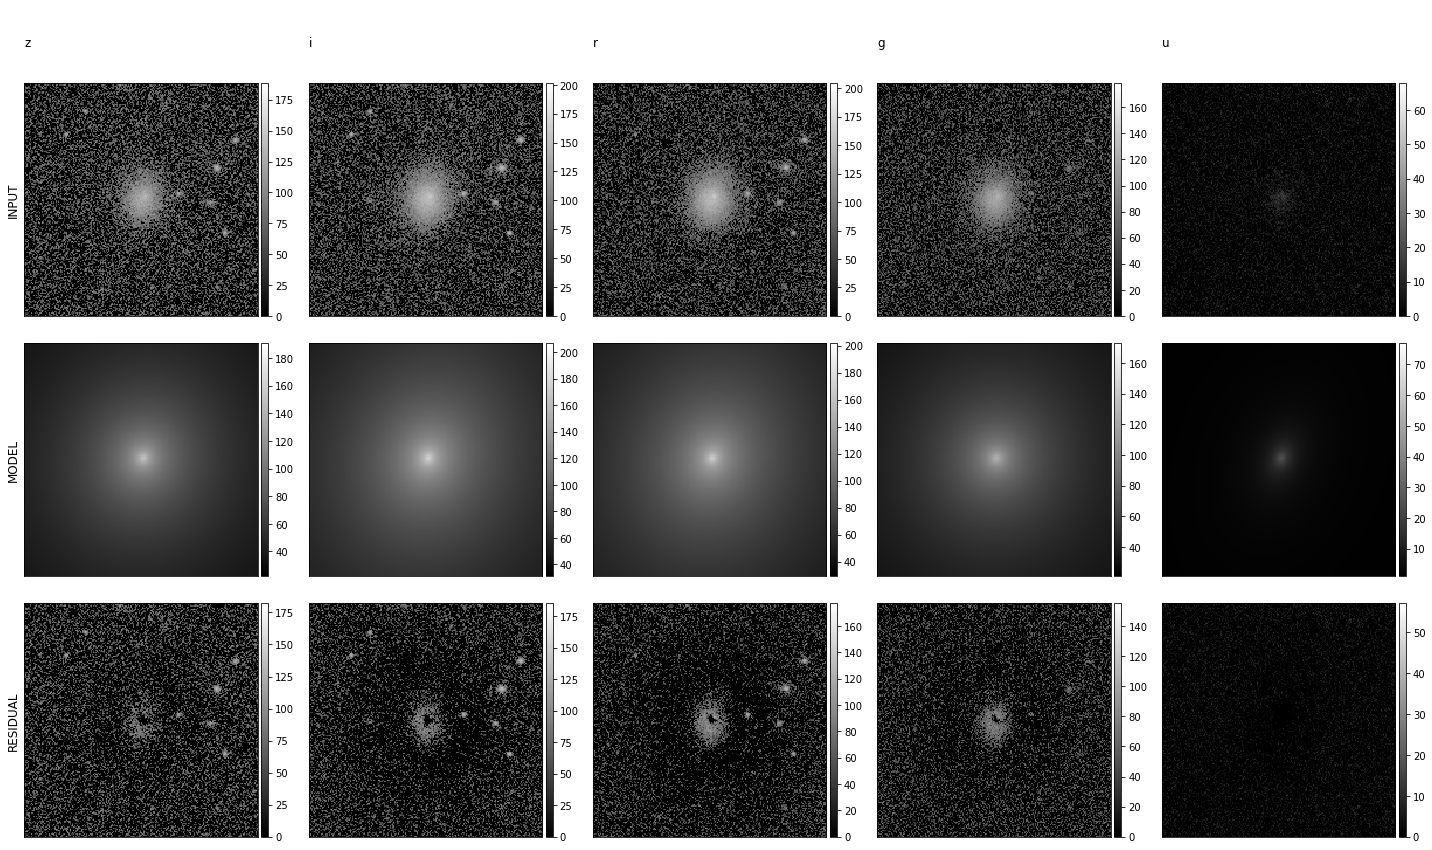

In [12]:
result_obj.print_component("sersic")
result_obj.gen_plot()

In [25]:
if not os.path.exists(os.path.join(outfolder, f"all_results.csv")):
    res_df = result_obj.create_result_table()
    res_df.to_csv(os.path.join(outfolder, f"all_results.csv"))

sersic


In [34]:
df = pd.read_csv(os.path.join(outfolder, f"all_results.csv"), index_col=0)

In [36]:
pd.concat([df, res_df], axis=1)

,Fornax.SPLUS-s25s33.001160,Fornax.SPLUS-s25s33.001160
ZP_g,23.490,23.490
ZP_i,23.344,23.344
ZP_r,23.535,23.535
ZP_u,20.850,20.850
ZP_z,22.766,22.766
sersic_Axis_ratio_g,0.942,0.942
sersic_Axis_ratio_i,0.861,0.861
sersic_Axis_ratio_r,0.861,0.861
sersic_Axis_ratio_u,0.658,0.658
sersic_Axis_ratio_z,0.914,0.914
